# Graduate Admission in US university

## <strong style="color:RoyalBlue">Introduction</strong>

Quality of education in US is one of the best around the world. As a result, worldwide many aspiring students are passionated to get admission in one of the prestigious university of US.

### Challenge

Since there is a fierce competition from students around the world, the attainment of graduate admission is one of the biggest challenge in student's career. In this project, I will explore the possibility for a student to get admission into one of the US university.

### Dataset

The dataset used here is acquired from https://www.kaggle.com/mohansacharya/graduate-admissions. This dataset contains  basic admission criteria of the students like latest GRE score, latest TOEFL score, rating of Letter of Recommendation (LOR), rating of Statement of Purpose (SOP), bachelor CGPA and whether he paticipated in any research project. Based on the given data, I will predict whether a student will get admitted in any university within US.

### Important findings

Few important findings I discovered from this project are:
1. CGPA is the most important factor affecting student's rate of admission.
2. GRE and TOEFL are the second important factors having high impact on graduate admission.
3. Research is not much deciding factor while considering graduate admission.

### ML Techniques

Since I'm already given the target value to predict, this problem is of type supervised learning problem. The target value for this challenge is the probability of graduate admission. It is the continous value. As a result, this problem can be termed as regression problem. 
Out of the most popular regression algorithms availabe, I used Lasso regression, Ridge regression, ElasticNet regression, RandomForest regression and GradientBoosting regression to compare the outcomes. Finally, Ridge regression is the best out of all others with alpha value of 10.

### About me

I'm the graduate alumni from one of the prestigious university of US. Due to my past experience and knowledge, I think this is one of the biggest challenge that most students are worried about most of the time. The intense preparation by students for graduate admission also affects their physical and mental health to some extent. Hence, I consider solving this challenge is really a crucial one and it will benefit many future aspirants.

## <strong style="color:RoyalBlue">Library Imports</strong>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
pd.options.display.max_columns=100

In [2]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [3]:
df = pd.read_csv('graduate_admission_v1.csv')
df.shape

(500, 9)

In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


## <strong style="color:RoyalBlue">Exploratory Analysis</strong>

In [5]:
df.drop('Serial No.', axis=1, inplace=True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df.shape

(500, 8)

In [7]:
df.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [8]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [9]:
df.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [10]:
df.rename(columns={'GRE Score':'GRE', 'TOEFL Score':'TOEFL', 'University Rating':'uni_rating',
                   'Chance of Admit ':'admit_prob'}, inplace=True)
df.head()

,GRE,TOEFL,uni_rating,SOP,LOR,CGPA,Research,admit_prob
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [11]:
df.describe()

,GRE,TOEFL,uni_rating,SOP,LOR,CGPA,Research,admit_prob
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


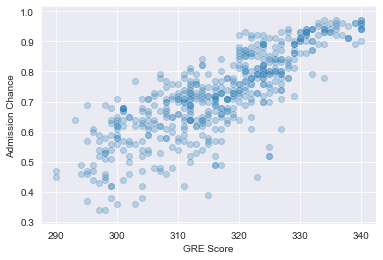

In [12]:
plt.scatter(df.GRE, df.admit_prob, alpha=0.25)
plt.xlabel('GRE Score')
plt.ylabel('Admission Chance')
plt.show()

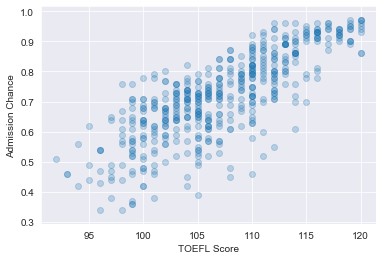

In [13]:
plt.scatter(df.TOEFL, df.admit_prob, alpha=0.25)
plt.xlabel('TOEFL Score')
plt.ylabel('Admission Chance')
plt.show()

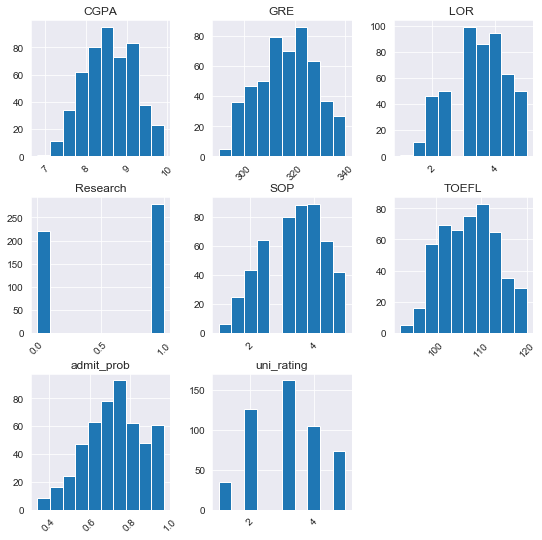

In [14]:
df.hist(figsize=(9,9), xrot=45)
plt.show()

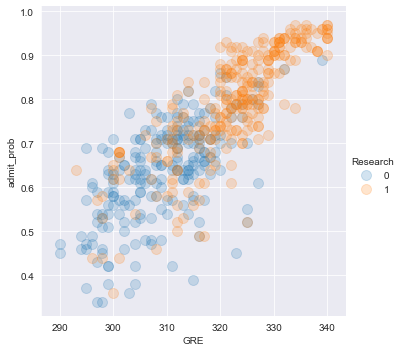

In [15]:
sns.lmplot(x='GRE', y='admit_prob', hue='Research', data=df, fit_reg=False, 
           scatter_kws={'alpha':0.2, 's':100})
plt.show()

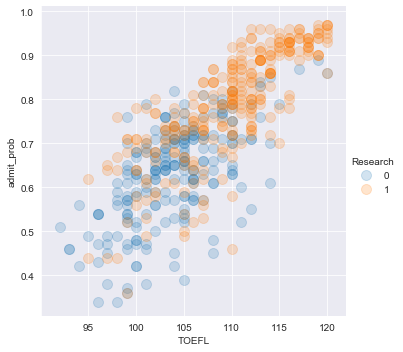

In [16]:
sns.lmplot(x='TOEFL', y='admit_prob', hue='Research', data=df, fit_reg=False,
           scatter_kws={'alpha':0.2, 's':100})
plt.show()

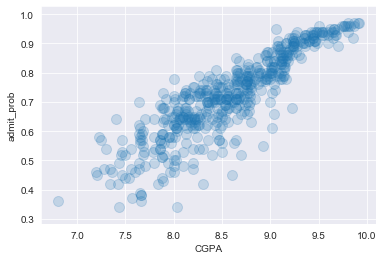

In [17]:
plt.scatter(df.CGPA, df.admit_prob, alpha=0.2, s=100)
plt.xlabel('CGPA')
plt.ylabel('admit_prob')
plt.show()

In [18]:
df.CGPA.nunique()

184

In [19]:
df.tail(10)

,GRE,TOEFL,uni_rating,SOP,LOR,CGPA,Research,admit_prob
490,307,105,2,2.5,4.5,8.12,1,0.67
491,297,99,4,3.0,3.5,7.81,0,0.54
492,298,101,4,2.5,4.5,7.69,1,0.53
493,300,95,2,3.0,1.5,8.22,1,0.62
494,301,99,3,2.5,2.0,8.45,1,0.68
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73
499,327,113,4,4.5,4.5,9.04,0,0.84


In [20]:
df.corr()

,GRE,TOEFL,uni_rating,SOP,LOR,CGPA,Research,admit_prob
GRE,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
uni_rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
admit_prob,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


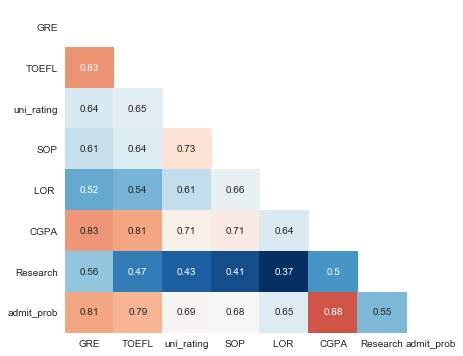

In [21]:
sns.set_style('white')
plt.figure(figsize=(7,6))

df_corr = df.corr()

bool_mask = np.zeros_like(df_corr)
bool_mask[np.triu_indices_from(df_corr)]=1

sns.heatmap(df_corr, cmap='RdBu_r', annot=True, mask=bool_mask, cbar=False)

plt.show()

## <strong style="color:RoyalBlue">Data Cleaning</strong>

In [22]:
# Check if there are any duplicate records
df.duplicated().sum()

0

## <strong style="color:RoyalBlue">Feature Engineering</strong>

* Dataset is already feature engineered

## <strong style="color:RoyalBlue">Algorithm Selection</strong>

Since the problem I'm facing is the regression one, I'll try few most important regression algorithms available. The algorithms I'm going to try are Lasso regression, Ridge regression, ElasticNet regression, RandomForest regression and GradientBoosting regression.

The key hyperparameters for each of the algorithm are as follows:
* Lasso: alpha
* Ridge: alpha
* ElasticNet: alpha, l1_ratio
* RandomForest: n_estimators, max_features
* GradientBoost: n_estimators, learning_rate, max_depth

## <strong style="color:RoyalBlue">Model Training</strong>

### Data Spending

In [23]:
# create X and y to separate input data and target variable
y = df.admit_prob
X = df.drop('admit_prob', axis=1)

In [24]:
# split total data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [25]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

400 100 400 100


In [26]:
X_train.head(10)

,GRE,TOEFL,uni_rating,SOP,LOR,CGPA,Research
296,310,107,3,3.5,3.5,8.67,0
220,313,103,3,4.0,4.0,8.75,0
0,337,118,4,4.5,4.5,9.65,1
255,307,110,4,4.0,4.5,8.37,0
335,325,111,4,4.0,4.5,9.11,1
141,332,118,2,4.5,3.5,9.36,1
225,296,99,2,2.5,2.5,8.03,0
322,314,107,2,2.5,4.0,8.27,0
342,308,106,3,3.0,3.0,8.24,0
51,312,100,2,1.5,3.5,7.90,1


In [27]:
X_train.describe()

,GRE,TOEFL,uni_rating,SOP,LOR,CGPA,Research
count,400.000000,400.000000,400.00000,400.000000,400.00000,400.000000,400.000000
mean,316.745000,107.305000,3.11750,3.365000,3.46375,8.586300,0.567500
std,11.336723,6.064976,1.15196,0.974242,0.91043,0.598889,0.496043
min,290.000000,92.000000,1.00000,1.000000,1.50000,6.800000,0.000000
25%,308.000000,103.000000,2.00000,2.500000,3.00000,8.137500,0.000000
50%,317.000000,107.000000,3.00000,3.500000,3.50000,8.570000,1.000000
75%,325.000000,112.000000,4.00000,4.000000,4.00000,9.060000,1.000000
max,340.000000,120.000000,5.00000,5.000000,5.00000,9.920000,1.000000


In [28]:
X_test.head()

,GRE,TOEFL,uni_rating,SOP,LOR,CGPA,Research
67,316,107,2,3.5,3.5,8.64,1
416,315,104,3,4.0,2.5,8.10,0
350,318,107,3,3.0,3.5,8.27,1
358,314,105,2,2.5,2.0,7.64,0
112,301,107,3,3.5,3.5,8.34,1


In [29]:
y_train.head()

296    0.76
220    0.76
0      0.92
255    0.79
335    0.83
Name: admit_prob, dtype: float64

### Pre-Processing & Pipelines

In [30]:
# Create pipelines dictionary
pipelines = {
    'lasso': make_pipeline(StandardScaler(), Lasso(random_state=1234)),
    'ridge': make_pipeline(StandardScaler(), Ridge(random_state=1234)),
    'enet': make_pipeline(StandardScaler(), ElasticNet(random_state=1234)),
    'rf': make_pipeline(StandardScaler(), RandomForestRegressor(random_state=1234)),
    'gb': make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=1234))
}

### Hyperparameter Tuning

In [31]:
# Lasso hyperparameters
lasso_hyperparameters = {
    'lasso__alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]
}

# Ridge hyperparameters
ridge_hyperparameters = {
    'ridge__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]
}

# Elastic Net hyperparameters
enet_hyperparameters = {
    'elasticnet__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
    'elasticnet__l1_ratio': [0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 0.9]
}

# RandomForest hyperparameters
rf_hyperparameters = {
    'randomforestregressor__n_estimators': [100, 200, 500, 1000],
    'randomforestregressor__max_features': ['auto', 'sqrt', 0.33, 0.25]
}

# GradientBoost hyperparameters
gb_hyperparameters = {
    'gradientboostingregressor__n_estimators': [100, 200, 500],
    'gradientboostingregressor__learning_rate': [0.05, 0.1, 0.2, 0.3],
    'gradientboostingregressor__max_depth': [1, 3, 5, 7]
}

In [32]:
# hyperparameters dictionary
hyperparameters = {
    'lasso': lasso_hyperparameters,
    'ridge': ridge_hyperparameters,
    'enet': enet_hyperparameters,
    'rf': rf_hyperparameters,
    'gb': gb_hyperparameters
}

### Winner Selection

In [33]:
import time

# Created empty dictionary named fitted_moels
fitted_models = {}

# Loop through model pipelines, tuning each one and storing in fitted_models
for name,pipeline in pipelines.items():
    start = time.time()
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    
    # Fit model on X_train, y_train
    model.fit(X_train, y_train)
    
    # Store a model in fitted_models
    fitted_models[name] = model
    
    end = time.time()
    print(name, ' has been fitted. Took ', np.around(end - start, decimals=2), ' seconds')

lasso  has been fitted. Took  16.24  seconds
ridge  has been fitted. Took  1.91  seconds
enet  has been fitted. Took  12.7  seconds
rf  has been fitted. Took  333.61  seconds
gb  has been fitted. Took  148.46  seconds


In [34]:
# check that the models have been fitted correctly
from sklearn.exceptions import NotFittedError

for name, model in fitted_models.items():
    try:
        pred = model.predict(X_test)
        print(name, 'has been fitted.')
    except NotFittedError as e:
        print(repr(e))

lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.
gb has been fitted.


In [35]:
# evaluate fitted models and print performance scores
for name,model in fitted_models.items():
    pred = model.predict(X_test)
    print()
    print(name)
    print('------------')
    print('R2 :', np.around(r2_score(y_test, pred), decimals=4))
    print('MSE :', np.around(mean_squared_error(y_test, pred), decimals=4))
    print('MAE :', np.around(mean_absolute_error(y_test, pred), decimals=4))
    print('Holdout R2 :', np.around(model.best_score_, decimals=4))


lasso
------------
R2 : 0.7945
MSE : 0.0047
MAE : 0.0466
Holdout R2 : 0.8195

ridge
------------
R2 : 0.7957
MSE : 0.0047
MAE : 0.0463
Holdout R2 : 0.8199

enet
------------
R2 : 0.7952
MSE : 0.0047
MAE : 0.0464
Holdout R2 : 0.8198

rf
------------
R2 : 0.7752
MSE : 0.0052
MAE : 0.049
Holdout R2 : 0.8016

gb
------------
R2 : 0.7749
MSE : 0.0052
MAE : 0.0472
Holdout R2 : 0.81


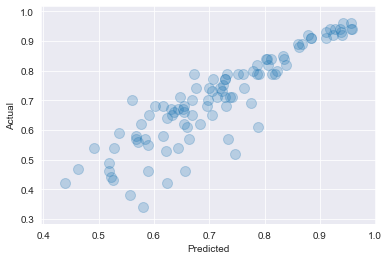

In [36]:
sns.set_style('darkgrid')
plt.scatter(fitted_models['ridge'].predict(X_test), y_test, alpha=0.25, s=100)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [37]:
fitted_models['ridge'].best_params_

{'ridge__alpha': 10}

In [38]:
fitted_models['ridge'].best_estimator_

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('ridge',
                 Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
                       normalize=False, random_state=1234, solver='auto',
                       tol=0.001))],
         verbose=False)

## <strong style="color:RoyalBlue">Insights & Analysis</strong>

Few key findings discovered from this project are:
1. CGPA is the most important factor affecting student's rate of admission.
2. GRE and TOEFL are the second important factors having high impact on graduate admission.
3. Research is not much deciding factor while considering graduate admission.

Winning model in this project is Ridge regression a.k.a. L2 Regularization. Among all models selected for study, Ridge regression has highest R2 score, lowest Mean Squared error and lowest Mean Absolute error, which clearly indicates that it is the only winner among all other models.

If time and resources permitted, I would expand this project where a student can see which university is the best depending on their location, subject and other preferences. Overall, this project was very exciting and I learned a lot.